###                                                                                         Name: Sharon Laurance Muthipeedika 
###                                                                                         Matriculation No: 312486

## Exercise 0: Dataset Preprocessing

In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import exp,sqrt
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso
from sklearn.model_selection import GridSearchCV,RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import operator
import itertools 

### (a) Generate a Sample dataset called D1

In [2]:
X= np.random.uniform(0.0866, 1.0866, (100,1)) #mu=1 and sigma=0.05

In [3]:
y= 1.3*(X**2)+4.8*X+8+np.random.rand(100,1)

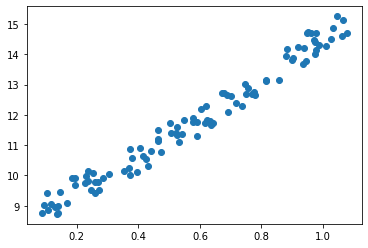

In [4]:
plt.scatter(X,y)

### (b) Wine Quality called D2

In [5]:
df=pd.read_csv("C:\\Users\\Sharon\\ML_LAB\\Lab 6\\winequality-red.csv",delimiter=';')

In [6]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


## Exercise 1: Generalized Linear Models with Scikit Learn

### 1. Split your data into Train and Test Splits according to the 80%:20% ratio

In [8]:
df2_train=df.sample(frac=0.8,random_state=3116) #random state is a seed value
df2_test=df.drop(df2_train.index)
print(np.shape(df2_train))
print(np.shape(df2_test))

(1279, 12)
(320, 12)


In [9]:
X=df2_train.iloc[:,0:11]
y=df2_train.iloc[:,11:12]
X_test=df2_test.iloc[:,0:11]
y_test=df2_test.iloc[:,11:12]

In [10]:
y=np.ravel(y)
y_test=np.ravel(y_test)

### 2. For each model, pick three sets of hyperparameters and learn each model (without cross validation). Measure Train and Test RMSE and plot it on one plot

In [11]:
#SGDRegressor
def ols(alpha_list):
    train_rmse_error=[]
    test_rmse_error=[]
    for alpha in alpha_list:
        model_ols=SGDRegressor(penalty=None,tol=1e-4,learning_rate='constant',eta0=alpha,loss='squared_loss').fit(X,y)
        Y_Pred_train_ols=model_ols.predict(X)
        Y_Pred_test_ols=model_ols.predict(X_test)
        train_rmse_error.append(sqrt(mean_squared_error(y,Y_Pred_train_ols)))
        test_rmse_error.append( sqrt(mean_squared_error(y_test,Y_Pred_test_ols)))
    return train_rmse_error,test_rmse_error
        

In [12]:
alpha_list=[0.00001,0.000001,0.0000001]
train_rmse_error,test_rmse_error=ols(alpha_list)
print("Training RMSE Error is",train_rmse_error)
print("Testing RMSE Error is",test_rmse_error)

Training RMSE Error is [0.7088340894246631, 0.722733656378676, 0.7631384730665224]
Testing RMSE Error is [0.7218285595933487, 0.7135732444326023, 0.7406151328425612]


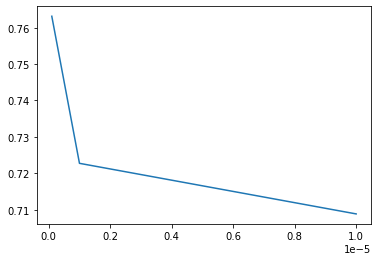

In [13]:
plt.plot(alpha_list,train_rmse_error)

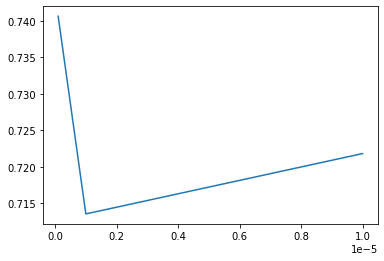

In [14]:
plt.plot(alpha_list,test_rmse_error)

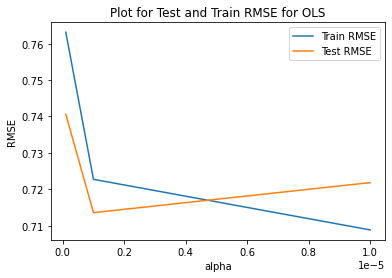

In [15]:
plt.plot(alpha_list,train_rmse_error,label="Train RMSE")
plt.plot(alpha_list,test_rmse_error,label="Test RMSE")
plt.title("Plot for Test and Train RMSE for OLS")
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.legend()
plt.show()

#### Overfitting occurs when the model makes much better predictions on known data than on unknown data.One way to avaoid overfitting is by using regularization

### Using SGDRegressor

In [16]:
#Ridge Regression
def ridge_model_sgd(eta0_list,alpha_list):
    train_rmse_error=[]
    test_rmse_error=[]
    for eta_i in eta0_list:
        for alpha_i in alpha_list:
            model_rr=SGDRegressor(penalty='l2',tol=1e-4,alpha=alpha_i,learning_rate='constant',eta0=eta_i,loss='squared_loss').fit(X,y)
            Y_Pred_train_rr=model_rr.predict(X)
            Y_Pred_test_rr=model_rr.predict(X_test)
            train_rmse_error.append(sqrt(mean_squared_error(y,Y_Pred_train_rr)))
            test_rmse_error.append( sqrt(mean_squared_error(y_test,Y_Pred_test_rr)))
    return train_rmse_error,test_rmse_error
        

In [17]:
eta0_list=[0.0000001,0.000001,0.00001] #Learning Rate
alpha_list=[0.0000001,0.000001,0.00001] #Regularisation Term
train_rmse_error,test_rmse_error=ridge_model_sgd(eta0_list,alpha_list)
print("Training RMSE Error is",train_rmse_error)
print("Testing RMSE Error is",test_rmse_error)

Training RMSE Error is [0.7626528896923146, 0.761954671785564, 0.7628940331867159, 0.7256194862952523, 0.7276189126582225, 0.7202133700180069, 0.7001475959836325, 0.7012636738078551, 0.7053808870960826]
Testing RMSE Error is [0.7400757951133932, 0.7391964055730028, 0.7402473792520913, 0.7154231999456754, 0.7142361121222854, 0.7145155268604448, 0.7126367877153024, 0.7063003205169702, 0.7194752548123098]


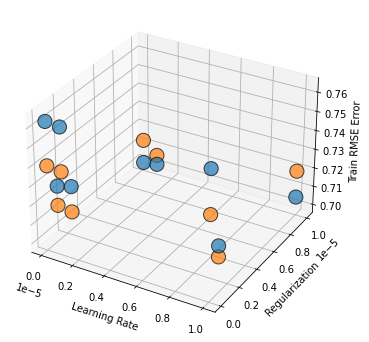

In [18]:
A, B = np.meshgrid(eta0_list, alpha_list)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(A, B, train_rmse_error,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           cmap='viridis')
ax.scatter(A, B, test_rmse_error,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           cmap='viridis')
ax.set_xlabel("Learning Rate")
ax.set_ylabel("Regularization")
ax.set_zlabel("Train RMSE Error")
plt.show()

### Using Ridge

In [19]:
#Ridge Regression
def ridge_model(alpha_list):
    train_rmse_error=[]
    test_rmse_error=[]
    for alpha in alpha_list:
        model_rr=Ridge(alpha).fit(X,y)
        Y_Pred_train_rr=model_rr.predict(X)
        Y_Pred_test_rr=model_rr.predict(X_test)
        train_rmse_error.append(sqrt(mean_squared_error(y,Y_Pred_train_rr)))
        test_rmse_error.append( sqrt(mean_squared_error(y_test,Y_Pred_test_rr)))
    return train_rmse_error,test_rmse_error
        

In [20]:
alpha_list=[0.0004,0.002,0.1]
train_rmse_error,test_rmse_error=ridge_model(alpha_list)
print("Training RMSE Error is",train_rmse_error)
print("Testing RMSE Error is",test_rmse_error)

Training RMSE Error is [0.6422748336466413, 0.6422881051691338, 0.6423122317265012]
Testing RMSE Error is [0.6637018572512873, 0.6638571873812222, 0.6641308638456577]


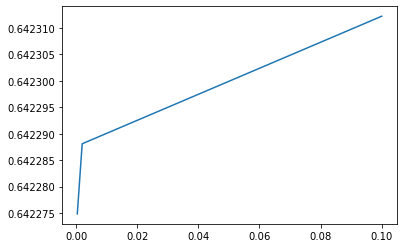

In [21]:
plt.plot(alpha_list,train_rmse_error)
# ax.plot(alpha_list,test_rmse_error)

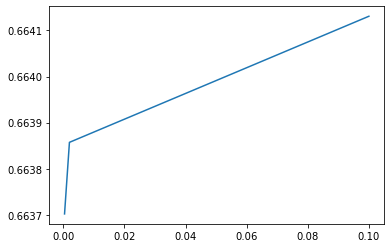

In [22]:
plt.plot(alpha_list,test_rmse_error)

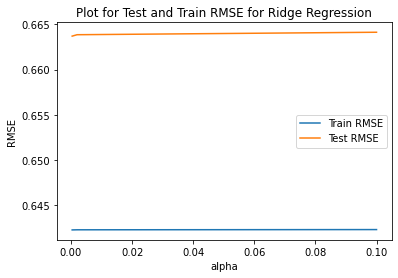

In [23]:
plt.plot(alpha_list,train_rmse_error,label="Train RMSE")
plt.plot(alpha_list,test_rmse_error,label="Test RMSE")
plt.title("Plot for Test and Train RMSE for Ridge Regression")
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.legend()
plt.show()

#### As there are minor change in RMSE as the plot both of those together they seem like constant lines

### You have to compare the following models and argument should explain underfitting and overfitting.

#### We control the complexity of our model with the regularization parameter, alpha in ridge and lasso regression.Higher values of alpha force coefficients to move towards zero and increases the restriction on the model. This decreases training performance, but also increases the generalizability of the model. Setting alpha too high could lead to a model that is too simple and underfits the data. Lower alpha values means coefficient are less restricted. When alpha becomes very small or zero model becomes equal to linear regression and we can overfit the model.

### Using SGDRegressor

In [24]:
#Lasso Regression
def lasso_model_sgd(eta0_list,alpha_list):
    train_rmse_error=[]
    test_rmse_error=[]
    for eta_i in eta0_list:
        for alpha_i in alpha_list:
            model_rr=SGDRegressor(penalty='l1',tol=1e-4,alpha=alpha_i,learning_rate='constant',eta0=eta_i,loss='squared_loss').fit(X,y)
            Y_Pred_train_rr=model_rr.predict(X)
            Y_Pred_test_rr=model_rr.predict(X_test)
            train_rmse_error.append(sqrt(mean_squared_error(y,Y_Pred_train_rr)))
            test_rmse_error.append( sqrt(mean_squared_error(y_test,Y_Pred_test_rr)))
    return train_rmse_error,test_rmse_error
        

In [25]:
eta0_list=[0.0000001,0.000001,0.00001] #Learning Rate
alpha_list=[0.000001,0.00001,0.0001] #Regularisation Term
train_rmse_error_lasso,test_rmse_error_lasso=lasso_model_sgd(eta0_list,alpha_list)
print("Training RMSE Error is",train_rmse_error_lasso)
print("Testing RMSE Error is",test_rmse_error_lasso)

Training RMSE Error is [0.7621813193107319, 0.7622975360442076, 0.7620632409777973, 0.7147277041263019, 0.7165816582891483, 0.7328815344538133, 0.7050234130205509, 0.6981062966404087, 0.699891617579636]
Testing RMSE Error is [0.7397870598883043, 0.7397459391262579, 0.7394719756887318, 0.7103064050555817, 0.7093042669160663, 0.7180330743817919, 0.7158777484878116, 0.7068389565000814, 0.7088196628320735]


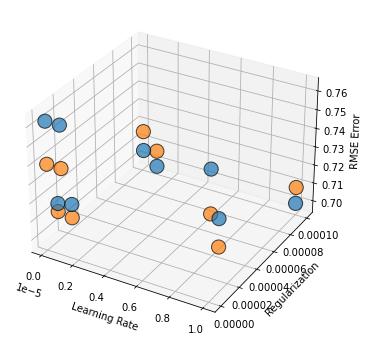

In [26]:
A, B = np.meshgrid(eta0_list, alpha_list)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(A, B, train_rmse_error_lasso,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           cmap='viridis')
ax.scatter(A, B, test_rmse_error_lasso,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           cmap='viridis')
ax.set_xlabel("Learning Rate")
ax.set_ylabel("Regularization")
ax.set_zlabel("RMSE Error")
plt.show()

### Using Lasso

In [27]:
#Lasso Regression
def lasso_model(alpha_list):
    train_rmse_error=[]
    test_rmse_error=[]
    for alpha in alpha_list:
        model_lasso=Lasso(alpha).fit(X,y)
        Y_Pred_train_lasso=model_lasso.predict(X)
        Y_Pred_test_lasso=model_lasso.predict(X_test)
        train_rmse_error.append(sqrt(mean_squared_error(y,Y_Pred_train_lasso)))
        test_rmse_error.append( sqrt(mean_squared_error(y_test,Y_Pred_test_lasso)))
    return train_rmse_error,test_rmse_error
        

In [28]:
alpha_list=[0.000001,0.00001,0.0001]
train_rmse_error,test_rmse_error=lasso_model(alpha_list)
print("Training RMSE Error is",train_rmse_error)
print("Testing RMSE Error is",test_rmse_error)

Training RMSE Error is [0.6422720589784194, 0.6423027744821848, 0.6423112497445732]
Testing RMSE Error is [0.663643220964134, 0.66397641950977, 0.6640846194413584]


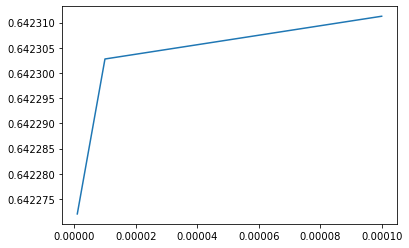

In [29]:
plt.plot(alpha_list,train_rmse_error)

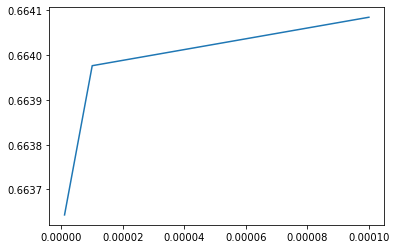

In [30]:
plt.plot(alpha_list,test_rmse_error)

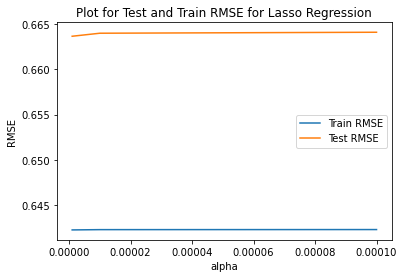

In [31]:
plt.plot(alpha_list,train_rmse_error,label="Train RMSE")
plt.plot(alpha_list,test_rmse_error,label="Test RMSE")
plt.title("Plot for Test and Train RMSE for Lasso Regression")
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.legend()
plt.show()

### You have to compare the following models and argument should explain underfitting and overfitting.

#### Lasso regression uses L1 regularization to force some coeffiecients to be exactly zero. So if coefficient becomes zero, those features will be ignored by the model. This can also lead to Automatic Feature Selection. Higher values of alpha force more coefficients to be zero and can cause underfitting. Lower values of alpha lead to fewer non-zero features and can cause overfitting. Very low values of alpha or zero will cause the model to be like linear regression.

### 3. Now tune the hyperparameters using scikit learn GridSearchCV and plot the results of cross validation for each model

In [32]:
# Cross Validation for Linear Regression
cv = RepeatedKFold(n_splits=20, n_repeats=5, random_state=3116)
ols = SGDRegressor()
param_grid=dict()
param_grid={
    'eta0':[0.1,0.01,0.001,0.0001,0.00001],
    'learning_rate':['constant','adaptive']
}
grid_search = GridSearchCV( ols,param_grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
results_ols = grid_search.fit(X, y)
print('Mean Squared Error: %.2f' % results_ols.best_score_)
print('Best Learning Rate: %s' % results_ols.best_params_)
print('CV Results: %s' % results_ols.cv_results_)

Mean Squared Error: -0.48
Best Learning Rate: {'eta0': 0.0001, 'learning_rate': 'adaptive'}
CV Results: {'mean_fit_time': array([0.00499904, 0.01718356, 0.00484276, 0.01499655, 0.00390541,
       0.01671471, 0.00421778, 0.0076544 , 0.00734185, 0.00937282]), 'std_fit_time': array([0.0072873 , 0.00680906, 0.00722498, 0.00908727, 0.00676436,
       0.00804303, 0.00693528, 0.00780905, 0.00779641, 0.00765288]), 'mean_score_time': array([0.00390527, 0.00218698, 0.00218678, 0.00359296, 0.00234318,
       0.00171841, 0.00281188, 0.00218701, 0.00265559, 0.00171838]), 'std_score_time': array([0.00676412, 0.00542038, 0.00585286, 0.00760655, 0.00557788,
       0.00488794, 0.0060016 , 0.00542045, 0.00586781, 0.00488784]), 'param_eta0': masked_array(data=[0.1, 0.1, 0.01, 0.01, 0.001, 0.001, 0.0001, 0.0001,
                   1e-05, 1e-05],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'pa

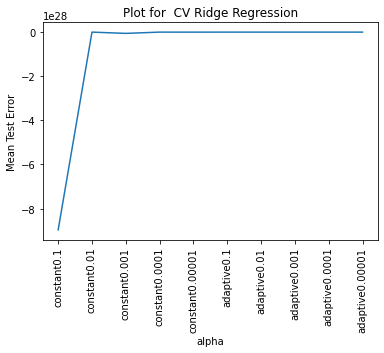

In [33]:
l1=[0.1,0.01,0.001,0.0001,0.00001]
learning_rate=['constant','adaptive']
c=['constant0.1','constant0.01','constant0.001','constant0.0001','constant0.00001','adaptive0.1','adaptive0.01','adaptive0.001','adaptive0.0001','adaptive0.00001']
plt.plot(c,results_ols.cv_results_['mean_test_score'])
plt.title("Plot for  CV Ridge Regression")
plt.xlabel('alpha')
plt.ylabel('Mean Test Error')
plt.xticks(rotation=90)
plt.show()

In [34]:
# Cross Validation for Ridge Regression
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
ridge_alphas = np.linspace(0.001, 0.1, 10) #Regularization strength
ridge = Ridge()
grid = dict()
# grid['alpha'] = ridge_alphas # Dict of all the parameters
grid={
    'alpha':ridge_alphas,
    'max_iter':[1000,2000,3000]
}

grid_search = GridSearchCV( ridge, grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
results_ridge = grid_search.fit(X, y)
print('Mean Squared Error: %.2f' % results_ridge.best_score_)
print('Best Learning Rate: %s' % results_ridge.best_params_)
print('CV Results: %s' % results_ridge.cv_results_)

Mean Squared Error: -0.42
Best Learning Rate: {'alpha': 0.1, 'max_iter': 1000}
CV Results: {'mean_fit_time': array([0.01100351, 0.00501708, 0.00515428, 0.0031243 , 0.00313684,
       0.00603663, 0.00571582, 0.00517422, 0.00652806, 0.00490982,
       0.00488827, 0.00457667, 0.00381204, 0.00349326, 0.00384744,
       0.00520748, 0.00364532, 0.00364492, 0.00312406, 0.00416582,
       0.00468651, 0.00416559, 0.00260357, 0.00520724, 0.00364496,
       0.00468616, 0.00468624, 0.00416573, 0.00387319, 0.00573168]), 'std_fit_time': array([0.00942451, 0.00468372, 0.00699012, 0.0062486 , 0.00581216,
       0.00779343, 0.01017958, 0.00631955, 0.00774173, 0.00393511,
       0.00373056, 0.00240008, 0.00351265, 0.0061469 , 0.0065436 ,
       0.00736448, 0.0066077 , 0.00660698, 0.00624812, 0.00690824,
       0.00715876, 0.00690784, 0.00582176, 0.00736414, 0.00660705,
       0.00821625, 0.00715836, 0.00690808, 0.00493348, 0.00753291]), 'mean_score_time': array([0.00352355, 0.00239309, 0.00114314, 0.001

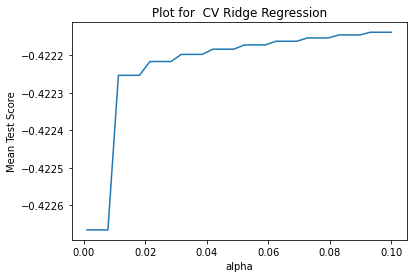

In [35]:
plt.plot(np.linspace(0.001, 0.1, 30),results_ridge.cv_results_['mean_test_score'])
plt.title("Plot for  CV Ridge Regression")
plt.xlabel('alpha')
plt.ylabel('Mean Test Score')
plt.show()

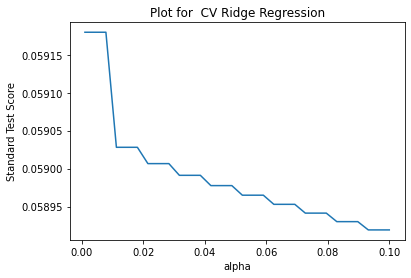

In [36]:
# m= list(itertools.product(ridge_alphas, max_iter))
plt.plot(np.linspace(0.001, 0.1, 30),results_ridge.cv_results_['std_test_score'])
plt.title("Plot for  CV Ridge Regression")
plt.xlabel('alpha')
plt.ylabel('Standard Test Score')
plt.show()

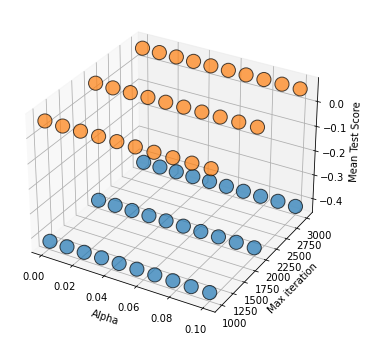

In [37]:
max_iter=[1000,2000,3000]
A, B = np.meshgrid(ridge_alphas, max_iter)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(A, B, results_ridge.cv_results_['mean_test_score'],
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           cmap='viridis')
ax.scatter(A, B, results_ridge.cv_results_['std_test_score'],
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           cmap='viridis')
ax.set_xlabel("Alpha")
ax.set_ylabel("Max iteration")
ax.set_zlabel("Mean Test Score")
plt.show()

In [38]:
# Cross Validation for Lasso Regression
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
lasso_alphas = np.linspace(0.001, 0.1, 100)
lasso = Lasso()
grid = dict()
grid['alpha'] = lasso_alphas # Dict of all the alphas 
grid_search = GridSearchCV( lasso, grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
results_lasso = grid_search.fit(X, y)
print('Mean Squared Error: %.2f' % results_lasso.best_score_)
print('Best Learning Rate: %s' % results_lasso.best_params_)
print('CV Results: %s' % results_lasso.cv_results_)


Mean Squared Error: -0.42
Best Learning Rate: {'alpha': 0.001}
CV Results: {'mean_fit_time': array([0.0050574 , 0.00401511, 0.00781072, 0.00520705, 0.00624856,
       0.00156237, 0.00520739, 0.00416539, 0.00520686, 0.00416575,
       0.00416567, 0.00364486, 0.00312438, 0.00364515, 0.00468651,
       0.00416606, 0.00520644, 0.00391115, 0.00649006, 0.00442196,
       0.00427594, 0.0055113 , 0.00391834, 0.00489549, 0.00417413,
       0.00277225, 0.00290558, 0.00327488, 0.00415035, 0.00172532,
       0.0052249 , 0.00505842, 0.00370834, 0.00459811, 0.00587332,
       0.00364489, 0.00689512, 0.00542256, 0.00481236, 0.0039268 ,
       0.00438093, 0.00484546, 0.0023464 , 0.00438125, 0.00364478,
       0.00572803, 0.00312429, 0.00624874, 0.00364501, 0.00572782,
       0.00468651, 0.00468674, 0.00416573, 0.00416551, 0.00260345,
       0.00416574, 0.00208278, 0.00416575, 0.00520705, 0.00416581,
       0.00468655, 0.00520705, 0.00416582, 0.00468628, 0.00364496,
       0.00520702, 0.00364502, 0.004

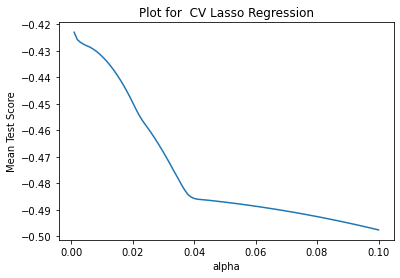

In [39]:
plt.plot(np.linspace(0.001, 0.1, 100),results_lasso.cv_results_['mean_test_score'])
plt.title("Plot for  CV Lasso Regression")
plt.xlabel('alpha')
plt.ylabel('Mean Test Score')
plt.show()

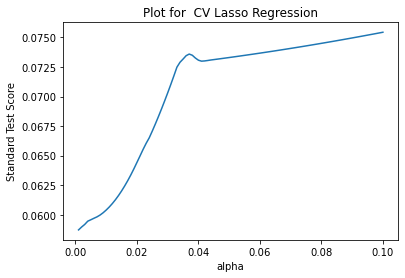

In [40]:
plt.plot(np.linspace(0.001, 0.1, 100),results_lasso.cv_results_['std_test_score'])
plt.title("Plot for  CV Lasso Regression")
plt.xlabel('alpha')
plt.ylabel('Standard Test Score')
plt.show()

### 4. Using the optimal hyperparameter you have to evaluate each model on the Test Set. Report the results in a meaningful manner.

In [41]:
model_ols=SGDRegressor(penalty=None,tol=1e-4,learning_rate='adaptive',eta0=results_ols.best_params_['eta0'],loss='squared_loss').fit(X,y)
Y_Pred_test_ols=model_ols.predict(X_test)
print("Test Error by selected best hyperparameters is",sqrt(mean_squared_error(y_test,Y_Pred_test_ols)))

Test Error by selected best hyperparameters is 0.7101849587706219


In [42]:
model_rr=Ridge(results_ridge.best_params_['alpha'],max_iter=1000).fit(X,y)
Y_Pred_train_rr=model_rr.predict(X)
Y_Pred_test_rr=model_rr.predict(X_test)
print("Test Error by selected best hyperparameters is",sqrt(mean_squared_error(y_test,Y_Pred_test_rr)))

Test Error by selected best hyperparameters is 0.6641308638456577


#### Best hyperparameter value is fed in the model for prediction. We can see that rmse value is 0.66 for Test Set

In [43]:
model_lasso=Lasso(results_lasso.best_params_['alpha']).fit(X,y)
Y_Pred_test_lasso=model_lasso.predict(X_test)
print("Test Error by selected best hyperparameters is",sqrt(mean_squared_error(y_test,Y_Pred_test_lasso)))

Test Error by selected best hyperparameters is 0.6662266976597117


## Exercise 2: Higher Order Polynomial Regression

In [44]:
def linear_regression(d):
    np.random.seed(3116)
    x= np.random.uniform(0.0866, 1.0866, (100,1)) #mu=1 and sigma=0.05 and sigma
    y= 1.3*(x**2)+4.8*x+8+np.random.rand(100,1)


    polynomial_features= PolynomialFeatures(d)
    x_poly = polynomial_features.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)


    plt.scatter(x, y)
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
    x, y_poly_pred = zip(*sorted_zip)
    plt.plot(x, y_poly_pred, color='m')
    plt.title("Plot with Polynomial Feature of Degree "+ str(d))
    plt.xlabel('x')
    plt.ylabel('Predicted values')
    plt.show()

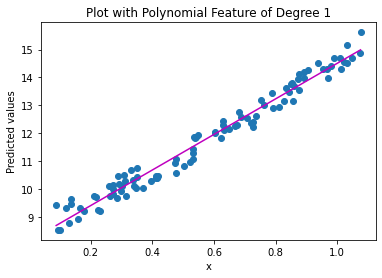

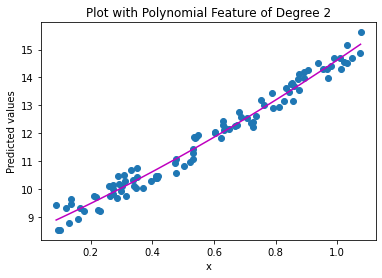

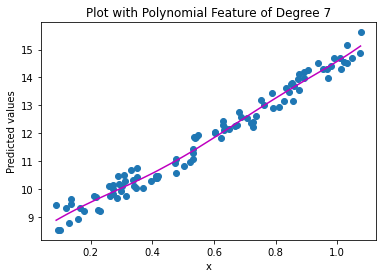

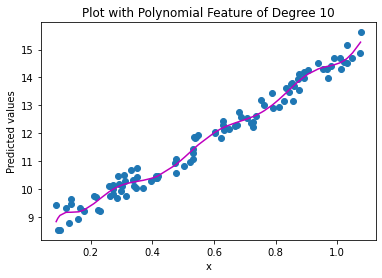

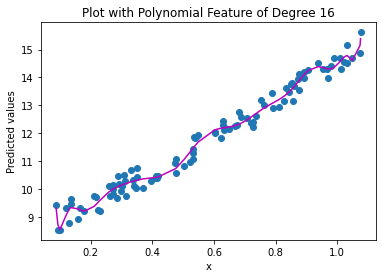

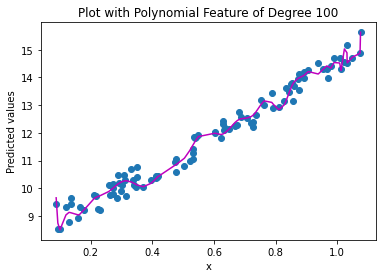

In [45]:
arr=[1,2,7,10,16,100]
for d in arr:
    linear_regression(d)

#### We can see as the degree increases Prediction Line goes through more and more input points. But this could lead to Overfitting

In [46]:
def ridge_regression(alpha):
    x= np.random.uniform(0.0866, 1.0866, (100,1)) #mu=1 and sigma=0.05 and sigma
    y= 1.3*(x**2)+4.8*x+8+np.random.rand(100,1)


    polynomial_features= PolynomialFeatures(10) #Degree of Polynomail is fized to 10
    x_poly = polynomial_features.fit_transform(x)
    model = Ridge(alpha)
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)


    plt.scatter(x, y)
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
    x, y_poly_pred = zip(*sorted_zip)
    plt.plot(x, y_poly_pred, color='m')
    plt.title("Plot with Regularization Term "+ str(alpha))
    plt.xlabel('x')
    plt.ylabel('Predicted values')
    plt.show()

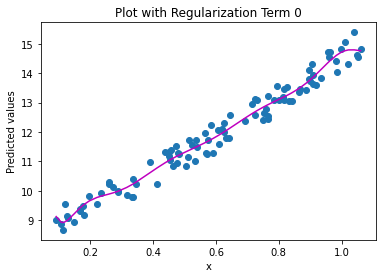

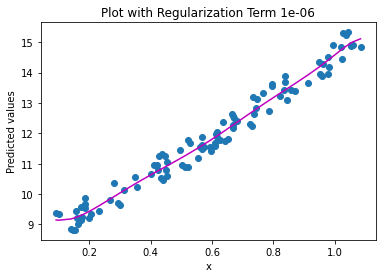

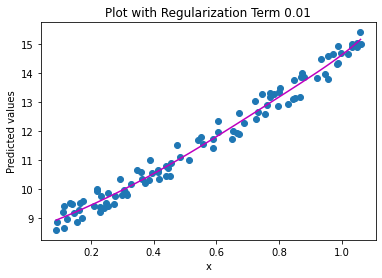

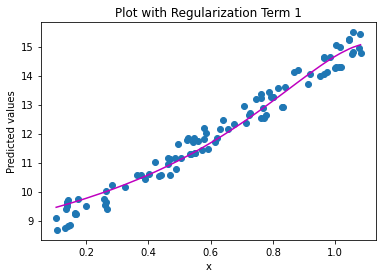

In [47]:
alpha_list=[0,10**(-6),10**(-2),1]
for alpha in alpha_list:
    ridge_regression(alpha)

#### We can see as degree of regularisation increases we can see major change in predicted values is not seen

## References
 - https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
 - https://python.plainenglish.io/ols-linear-regression-basics-with-pythons-scikit-learn-4ecfe88145b
 - https://www.pluralsight.com/guides/linear-lasso-ridge-regression-scikit-learn
 - https://towardsdatascience.com/polynomial-regression-bbe8b9d97491
 - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html
 - https://towardsdatascience.com/linear-regression-models-4a3d14b8d368